In [163]:
from src.sokoban import Sokoban
from src.tree import recorre_arbol

class Config:
    def __init__(self):    
        self.algoritmo = "dfs"
        self.heuristicas = ["manhattan", "distancia_a_caja"]
        self.verbose = False
        self.mapa = """
        """
        
config = Config()

# Ejemplo 1

Para este primer ejemplo se comparan todos los algoritmos para ver sus diferencias.

In [164]:
config.mapa = """
#######
#@$  .#
#   $ #
#   . #
#     #
#######
"""

global_results = {}
for algoritmo in ["bfs", "dfs", "greedy", "a_star"]:
    config.algoritmo = algoritmo
    sokoban = Sokoban()
    sokoban.parse_grid(config.mapa)
    results = recorre_arbol(sokoban, config)

    print(algoritmo)
    print("\ttiempo total:\t\t{:.5f}".format(results["tiempo"]))
    print("\tnodos recorridos:\t{}".format(len(results["nodos_explorados"])))
    print("\tmovimientos:\t\t{}".format(len(results["movimientos"])))
    print()

    global_results[algoritmo] = results

bfs
	tiempo total:		0.01663
	nodos recorridos:	36
	movimientos:		4

dfs
	tiempo total:		1.06790
	nodos recorridos:	564
	movimientos:		174

greedy
	tiempo total:		0.00079
	nodos recorridos:	4
	movimientos:		4

a_star
	tiempo total:		0.00111
	nodos recorridos:	4
	movimientos:		4



El algritmo BFS nos indica el optimo global del problema, que tambien es alcanzado por la solución greedy y a_star.
Cabe notar que estos dos ultimos recorren una menor cantidad de nodos.
El algoritmo DFS explora una gran cantidad de nodos, sin embargo la solución hallada no es optima.

# Ejemplo 2

El DFS es el algoritmo mas rapido, sin embargo su solución no es optima.
Con la ayuda de la heuristica, el algoritmo greedy presenta el mejor balance en tiempos vs cantidad de moviientos.
El algoritmo a_star explora una mayor cantidad de nodos que el resto.

In [165]:
config.mapa = """
########
#      #
# .**$@#
#      #
#####  #
    ####
"""
config.heuristicas = ["manhattan"]


global_results = {}
for algoritmo in ["bfs", "dfs", "greedy", "a_star"]:
    config.algoritmo = algoritmo
    sokoban = Sokoban()
    sokoban.parse_grid(config.mapa)
    results = recorre_arbol(sokoban, config)

    print(algoritmo)
    print("\ttiempo total:\t\t{:.5f}".format(results["tiempo"]))
    print("\tnodos recorridos:\t{}".format(len(results["nodos_explorados"])))
    print("\tmovimientos:\t\t{}".format(len(results["movimientos"])))
    print()

    global_results[algoritmo] = results

bfs
	tiempo total:		12.80737
	nodos recorridos:	2078
	movimientos:		23

dfs
	tiempo total:		5.22153
	nodos recorridos:	886
	movimientos:		257

greedy
	tiempo total:		4.09465
	nodos recorridos:	876
	movimientos:		31

a_star
	tiempo total:		17.56101
	nodos recorridos:	1618
	movimientos:		23



Puede observarse que la heuristica que toma la distancia manhatan nunca sobreestima el costo de la solución.

In [166]:
a_star = global_results["a_star"]
costo_estimado = []
for n in a_star["nodos_explorados"]:
    costo_estimado.append(n.get_actual_cost())

print("La solución optima lleva {} pasos".format(len(global_results["bfs"]["movimientos"])))
print("La máxima estimación de la heuritica fue {} pasos".format(max(costo_estimado)))

La solución optima lleva 23 pasos
La máxima estimación de la heuritica fue 22 pasos


# Ejemplo 3
Para este ejemplo se varía las heurisiticas utilizadas en conjunto con el algoritmo a_star.



In [167]:

config = Config()
config.mapa = """
########
#      #
# .**$@#
#      #
#####  #
    ####
"""
config.heuristicas = []
config.algoritmo = "a_star"


for heuristicas in [["manhattan"], ["distancia_a_caja"], ["manhattan", "distancia_a_caja"]]:
    config.heuristicas = heuristicas
    sokoban = Sokoban()
    sokoban.parse_grid(config.mapa)
    results = recorre_arbol(sokoban, config)

    print(*heuristicas, sep=" + ")
    print()
    print("\ttiempo total:\t\t\t{:.5f}".format(results["tiempo"]))
    print("\tnodos recorridos:\t\t{}".format(len(results["nodos_explorados"])))
    print("\tmovimientos:\t\t\t{}".format(len(results["movimientos"])))
    for n in results["nodos_explorados"]:
        costo_estimado.append(n.get_actual_cost())
    print("\tmax estimación de costo:\t{}".format(max(costo_estimado)))
    print()

manhattan

	tiempo total:			20.28050
	nodos recorridos:		1618
	movimientos:			23
	max estimación de costo:	22

distancia_a_caja

	tiempo total:			9.20242
	nodos recorridos:		1366
	movimientos:			23
	max estimación de costo:	22

manhattan + distancia_a_caja

	tiempo total:			27.18898
	nodos recorridos:		1640
	movimientos:			23
	max estimación de costo:	23



Puede observarse que la heuristica distancia a la caja permite recorrer menor cantidad de de nodos para alcanzar la solución.
Ademas es computacionalmente más rápida que la heurisitica manhattan.

Por este motivo se repite el primer ejemplo con la heuristica distancia a la caja

In [190]:
config.mapa = """
########
#      #
# .**$@#
#      #
#####  #
    ####
"""
config.heuristicas = ["distancia_a_caja"]


global_results = {}
for algoritmo in ["bfs", "dfs", "greedy", "a_star"]:
    config.algoritmo = algoritmo
    sokoban = Sokoban()
    sokoban.parse_grid(config.mapa)
    results = recorre_arbol(sokoban, config)

    print(algoritmo)
    print("\ttiempo total:\t\t{:.5f}".format(results["tiempo"]))
    print("\tnodos recorridos:\t{}".format(len(results["nodos_explorados"])))
    print("\tmovimientos:\t\t{}".format(len(results["movimientos"])))
    print()

    global_results[algoritmo] = results

bfs
	tiempo total:		14.69110
	nodos recorridos:	2078
	movimientos:		23

dfs
	tiempo total:		2.47797
	nodos recorridos:	886
	movimientos:		257

greedy
	tiempo total:		3.90141
	nodos recorridos:	799
	movimientos:		23

a_star
	tiempo total:		9.66161
	nodos recorridos:	1366
	movimientos:		23



Un resultado interesante es que el algoritmo greedy sigue siendo mejor que a_star.


Se puede graficar los diferentes nodos que fueron visitados por los algoritmos:

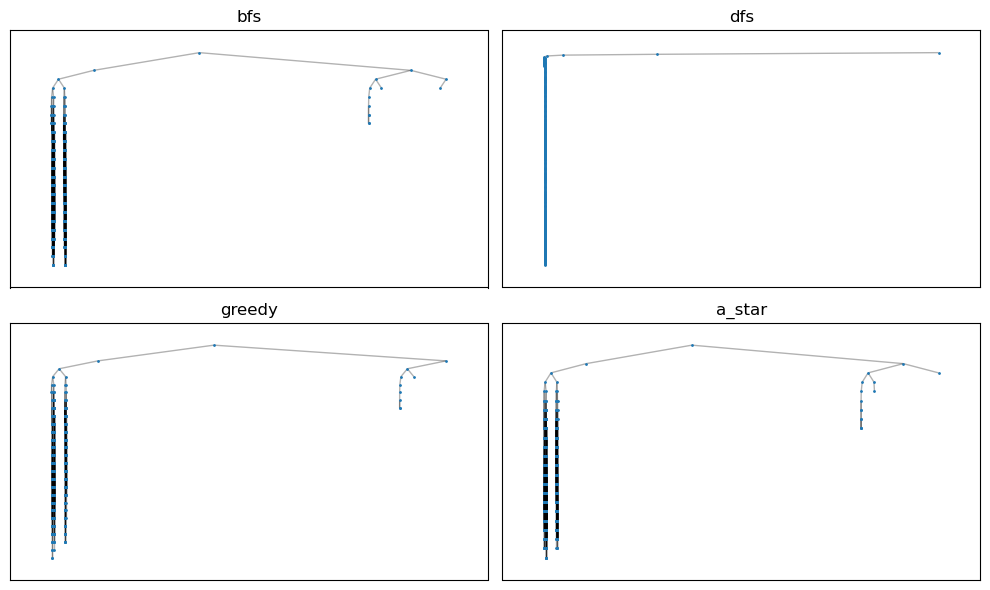

In [214]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


def get_position(results):
    G = nx.Graph()
    for nodo in results["nodos_explorados"]:
        child  = nodo.movements
        parent = nodo.movements[:-1]
        if child == parent: continue

        G.add_edge(child, parent)

    pos = {}
    for node in sorted(list(G.nodes), key=lambda x: len(x)):
        posicion = {
            "": 0,
            "r": 1,
            "l": -2,
            "u": -1,
            "d": 2,
        }

        if not node:
            pos[node] = [0, 0]
            continue

        parent = node[:-1]
        last = node[-1] if node else ""

        y = -len(node) - 1
        x = pos[parent][0] + posicion.get(last) * (4 / (6 ** abs(y)))

        pos[node] = [x, y]
    return G, pos

fig, ax = plt.subplots(2, 2, figsize=(10,6))


G, pos = get_position(global_results["bfs"])
nx.draw_networkx_edges(G, pos, ax=ax[0,0], alpha=0.3)
nx.draw_networkx_nodes(G, pos, ax=ax[0,0], node_size=1)
ax[0,0].set_title("bfs")

G, pos = get_position(global_results["dfs"])
nx.draw_networkx_edges(G, pos, ax=ax[0,1], alpha=0.3)
nx.draw_networkx_nodes(G, pos, ax=ax[0,1], node_size=1)
ax[0,1].set_title("dfs")

G, pos = get_position(global_results["greedy"])
nx.draw_networkx_edges(G, pos, ax=ax[1,0], alpha=0.3)
nx.draw_networkx_nodes(G, pos, ax=ax[1,0], node_size=1)
ax[1,0].set_title("greedy")

G, pos = get_position(global_results["a_star"])
nx.draw_networkx_edges(G, pos, ax=ax[1,1], alpha=0.3)
nx.draw_networkx_nodes(G, pos, ax=ax[1,1], node_size=1)
ax[1,1].set_title("a_star")


plt.tight_layout()
plt.show()

Si bien bfs, greedy y a_star se ven similares.
Se observa que el bfs es más denso en relación a los algoritmos gredy y a_star, principalmente en los primeros niveles.
Del dfs se observa claramente su tendencia a ir hacía un nivel superior para encontrar la solución.